In [1]:
!pip install pydot

  Running setup.py bdist_wheel for pydot: started
  Running setup.py bdist_wheel for pydot: finished with status 'done'
  Stored in directory: C:\Users\richter Belmont\AppData\Local\pip\Cache\wheels\59\31\1e\44e7c5c8f5f9bfdf518752a375dabb0dd06f316e373edb19ed
Successfully built pydot
  Found existing installation: pyparsing 2.0.3
    Uninstalling pyparsing-2.0.3:
      Successfully uninstalled pyparsing-2.0.3


    DEPRECATION: Uninstalling a distutils installed project (pyparsing) has been deprecated and will be removed in a future version. This is due to the fact that uninstalling a distutils project will only partially uninstall the project.


In [2]:
!pip install pydot2

  Running setup.py bdist_wheel for pydot2: started
  Running setup.py bdist_wheel for pydot2: finished with status 'done'
  Stored in directory: C:\Users\richter Belmont\AppData\Local\pip\Cache\wheels\fa\34\02\449c79205f573b8b7b34e160d1b9c0bbb2c7d0791b967ebb88
Successfully built pydot2


In [ ]:
!pip uninstall pyparsing

In [ ]:
!pip install pyparsing==1.5.7
!pip install pydot

In [1]:
import pandas as pd
import sklearn.tree
import numpy as np
import matplotlib.pyplot as plt

In [2]:
phonecase = pd.read_csv('C:\\Users\\richter Belmont\\Project-Zero\\SYD_DAT_5\\data\\phonecase.csv')

In [3]:
phonecase

,Age,Income,Colour
0,12,0,Red
1,14,10,Red
2,15,0,Red
3,17,500,Yellow
4,18,10000,Red
5,19,30000,Yellow
6,21,0,Yellow
7,21,20000,Yellow
8,23,30000,Yellow
9,25,40000,Pink


In [4]:
classifier = sklearn.tree.DecisionTreeClassifier(criterion='gini', max_depth=1)

In [5]:
classifier.fit(phonecase[['Age','Income']],phonecase[['Colour']])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [6]:
classifier.predict([[41,60000]])

array(['Pink'], dtype=object)

In [7]:
classifier.predict([[21,1000]])

array(['Yellow'], dtype=object)

In [8]:
classifier.predict(phonecase[['Age', 'Income']])

array(['Yellow', 'Yellow', 'Yellow', 'Yellow', 'Yellow', 'Yellow',
       'Yellow', 'Yellow', 'Yellow', 'Pink', 'Pink', 'Pink', 'Pink',
       'Pink', 'Pink', 'Pink', 'Pink', 'Pink'], dtype=object)

In [9]:
classifier.feature_importances_
#it's only using age to predict and not income

array([ 1.,  0.])

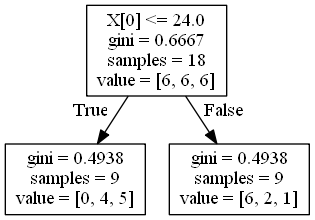

In [12]:
# Using String IO to display diagram as temporary memory

import StringIO
import IPython.display
import pydotplus
File_obj = StringIO.StringIO()
sklearn.tree.export_graphviz(classifier, out_file=File_obj)
graph = pydotplus.graph_from_dot_data(File_obj.getvalue())
IPython.display.Image(graph.create_png())

In [13]:
print File_obj.getvalue()

digraph Tree {
node [shape=box] ;
0 [label="X[0] <= 24.0\ngini = 0.6667\nsamples = 18\nvalue = [6, 6, 6]"] ;
1 [label="gini = 0.4938\nsamples = 9\nvalue = [0, 4, 5]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.4938\nsamples = 9\nvalue = [6, 2, 1]"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
}


In [23]:
!pip install pydotplus

  Running setup.py bdist_wheel for pydotplus: started
  Running setup.py bdist_wheel for pydotplus: finished with status 'done'
  Stored in directory: C:\Users\richter Belmont\AppData\Local\pip\Cache\wheels\43\31\48\e1d60511537b50a8ec28b130566d2fbbe4ac302b0def4baa48
Successfully built pydotplus


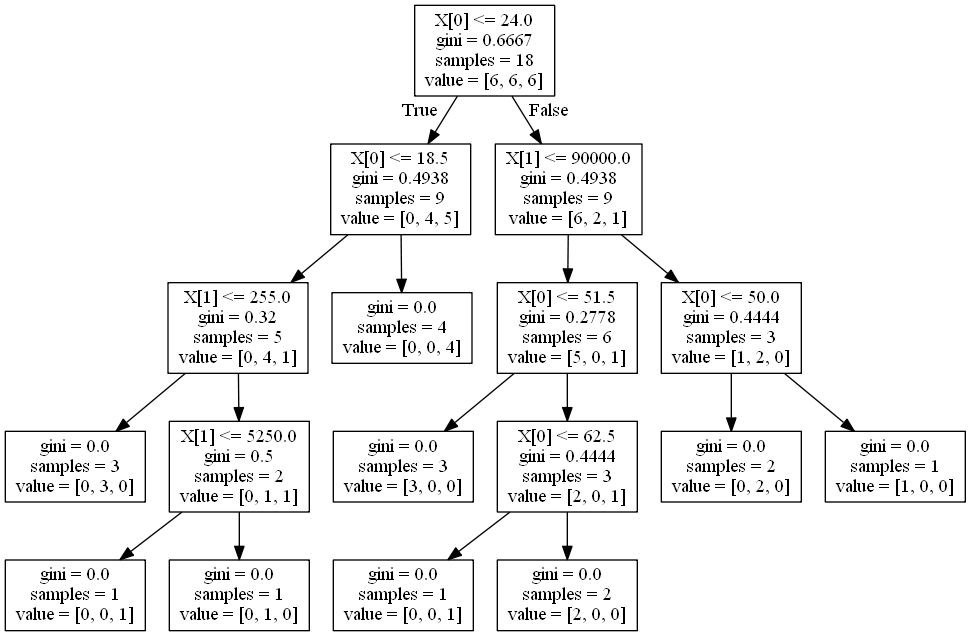

In [19]:
new_classifier = sklearn.tree.DecisionTreeClassifier(criterion='gini', max_depth=5)
new_classifier.fit(phonecase[['Age','Income']],phonecase[['Colour']])
new_file_obj = StringIO.StringIO()
sklearn.tree.export_graphviz(new_classifier,out_file=new_file_obj)
new_graph = pydotplus.graph_from_dot_data(new_file_obj.getvalue())
IPython.display.Image(new_graph.create_png())

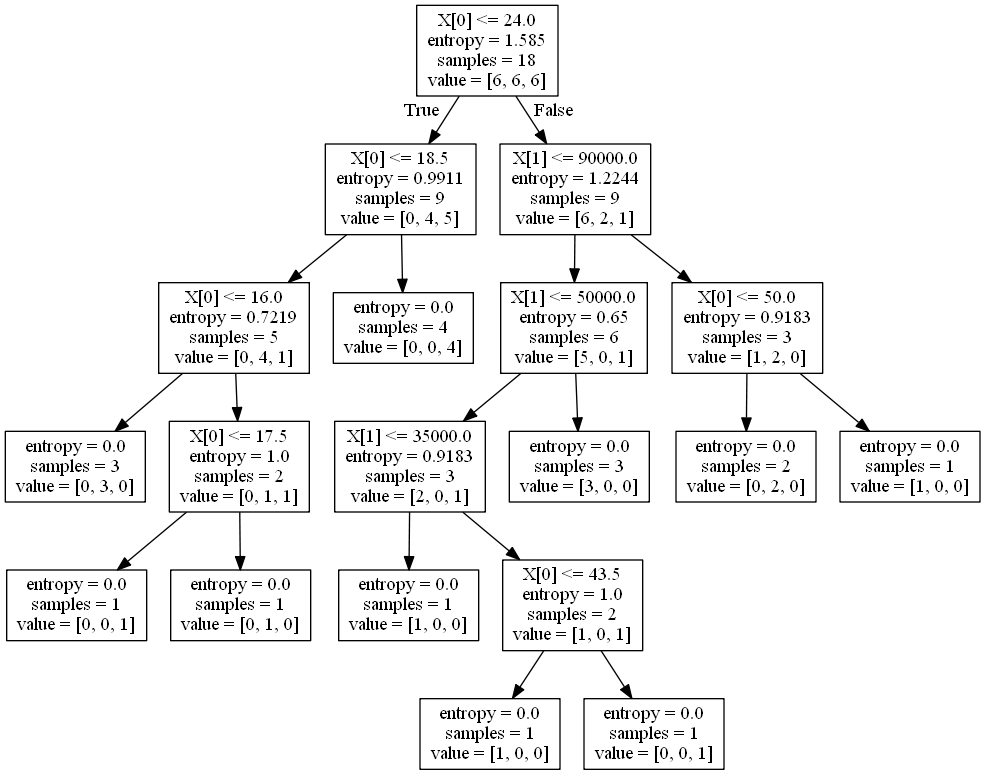

In [18]:
entropy_classifier = sklearn.tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
entropy_classifier.fit(phonecase[['Age','Income']],phonecase[['Colour']])
entropy_file_obj = StringIO.StringIO()
sklearn.tree.export_graphviz(entropy_classifier,out_file=entropy_file_obj)
entropy_graph = pydotplus.graph_from_dot_data(entropy_file_obj.getvalue())
IPython.display.Image(entropy_graph.create_png())

In [17]:
entropy_classifier.feature_importances_
# It says 70% boils down to age and 30% to income
# 70% of customers purchase decision down to age

array([ 0.74871462,  0.25128538])